**Analyzing body measurements of adult males and females**

**Step 1: Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


**Step 2: Load the data**

In [3]:
male = np.loadtxt('/content/drive/MyDrive/corizo intern/nhanes_adult_male_bmx_2020.csv', delimiter=',', skiprows=1)
female = np.loadtxt('/content/drive/MyDrive/corizo intern/nhanes_adult_female_bmx_2020.csv', delimiter=',', skiprows=1)


**Step 3: Plot Histograms for Male and Female Weights**

**Discussion:**

**Female Weight Distribution:** The histogram shows how female weights are distributed across the dataset. You may observe a concentration of values around a certain range (e.g., 50-70 kg), and possibly some outliers on both the low and high ends. The spread will give an initial idea of the variance in female body weights.

**Male Weight Distribution:** Similarly, the male weight histogram may show a different concentration of values, often higher than that of females due to physiological differences. If the male weights have a larger range or more outliers, it could indicate higher variability in male body weights.

**Comparison:** Compare the two histograms by identifying key differences, such as the central tendency (peak), range, and number of outliers. If male weights are generally higher, this could indicate gender differences in muscle mass, bone density, or other factors.

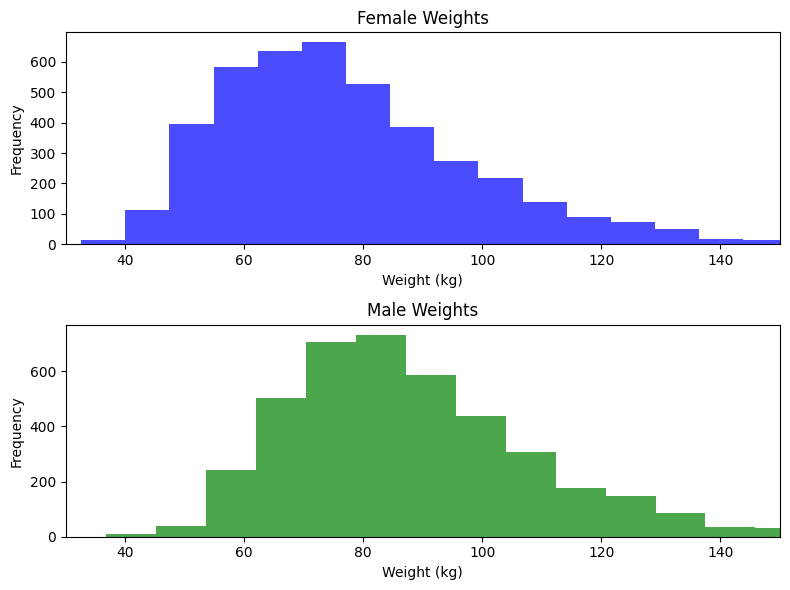

In [4]:
female_weights = female[:, 0]
male_weights = male[:, 0]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot histograms
axs[0].hist(female_weights, bins=20, color='blue', alpha=0.7)
axs[0].set_title('Female Weights')
axs[0].set_xlim([30, 150])  # adjust as necessary
axs[0].set_xlabel('Weight (kg)')
axs[0].set_ylabel('Frequency')

axs[1].hist(male_weights, bins=20, color='green', alpha=0.7)
axs[1].set_title('Male Weights')
axs[1].set_xlim([30, 150])  # make identical to female plot
axs[1].set_xlabel('Weight (kg)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Step 4: Boxplot Comparison of Male and Female Weights**

**Discussion:**

**Spread and Range:**  The boxplot shows the interquartile range (IQR), which represents the middle 50% of the data. If the male boxplot has a wider range than the female, it suggests that male weights are more varied.

**Median: **The line inside the box represents the median. You can compare the median weight for males and females, which provides an idea of where most individuals fall. For instance, the male median is likely to be higher than the female median.

**Outliers:** Outliers appear as individual points outside the whiskers. Discuss the number and extent of these outliers, as they may indicate rare cases of very low or very high body weight.

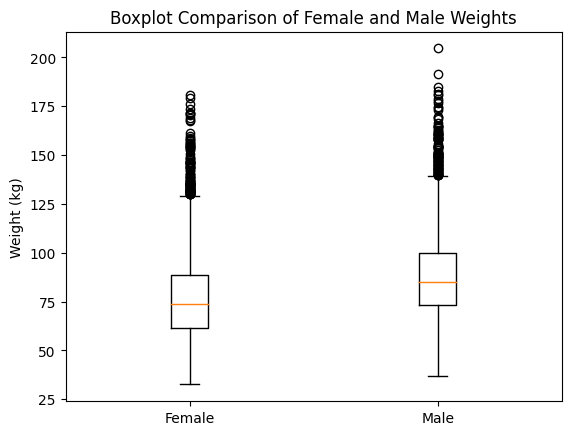

In [5]:
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Boxplot Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.show()


**Step 5:Compute Basic Numerical Aggregates**

**Discussion:**

**Mean and Median:** The mean and median tell us about the central tendency. If the mean is higher than the median, the distribution may be skewed to the right, indicating that there are a few heavier individuals pulling the average upwards.

**Standard Deviation:** A larger standard deviation for one group (e.g., males) would indicate more variability in that group’s weights. For instance, if male weights have a higher standard deviation than female weights, it suggests that male weights are more spread out.

**Skewness: **Skewness shows the asymmetry in the distribution. Positive skew indicates a longer right tail, meaning there are a few individuals with very high weights. Negative skew suggests a longer left tail.

**Kurtosis:** Kurtosis indicates the "tailedness" of the distribution. A higher kurtosis value means more data points are in the tails (either very low or very high weights). If male weights have a higher kurtosis, it might suggest more individuals with extreme weights compared to females.

In [6]:
from scipy.stats import skew

def describe_data(data):
    return {
        'mean': np.mean(data),
        'median': np.median(data),
        'variance': np.var(data),
        'std_dev': np.std(data),
        'skewness': skew(data)
    }

print("Female Weights:", describe_data(female_weights))
print("Male Weights:", describe_data(male_weights))


Female Weights: {'mean': 77.40379057095475, 'median': 73.6, 'variance': 464.07966343304065, 'std_dev': 21.54250829019315, 'skewness': 1.03336107186799}
Male Weights: {'mean': 88.36454300416565, 'median': 85.0, 'variance': 458.770850128082, 'std_dev': 21.418936717962495, 'skewness': 0.9842810741662347}


**Step 6:Add BMI Column to Female Matrix**

**Discussion:**

**BMI Interpretation:** BMI is a standardized metric used to classify individuals into categories such as underweight, normal weight, overweight, or obese. Adding BMI as a new column allows for further analysis of body composition, and comparisons to general health standards.

**Insights: **Once the BMI column is added, we can check if the distribution of BMI correlates with other body measurements like height or waist circumference, giving us an initial sense of body composition differences.


In [7]:
female_bmi = female_weights / (female[:, 1] / 100) ** 2
female = np.column_stack((female, female_bmi))


**Step 7:Create a Standardized Female Matrix**

**Discussion:**

**Z-Score Interpretation:** Standardizing the data converts all columns to the same scale (mean of 0 and standard deviation of 1), which is essential when comparing different variables (e.g., weight, height, BMI) that are originally on different scales.

**Comparisons:** Once the data is standardized, it allows us to compare variables directly to see which individuals are above or below the average in terms of weight, height, etc. For example, individuals with z-scores above 2 for BMI would be considered significantly overweight compared to the average.

In [8]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)


**Step 8:Draw a Scatterplot Matrix**

**Discussion:**

**Relationships Between Variables: **The scatterplot matrix allows for visual inspection of correlations between variables. For instance, if the scatterplots between BMI and waist circumference or hip circumference show a clear positive trend, it means these variables are highly correlated.

**Insights: **Patterns observed here can guide further analysis. For example, a strong linear relationship between height and weight would be expected, but if any unexpected relationships arise, such as an unexpected lack of correlation between BMI and waist circumference, this could lead to interesting insights or hypotheses about body composition in the dataset.

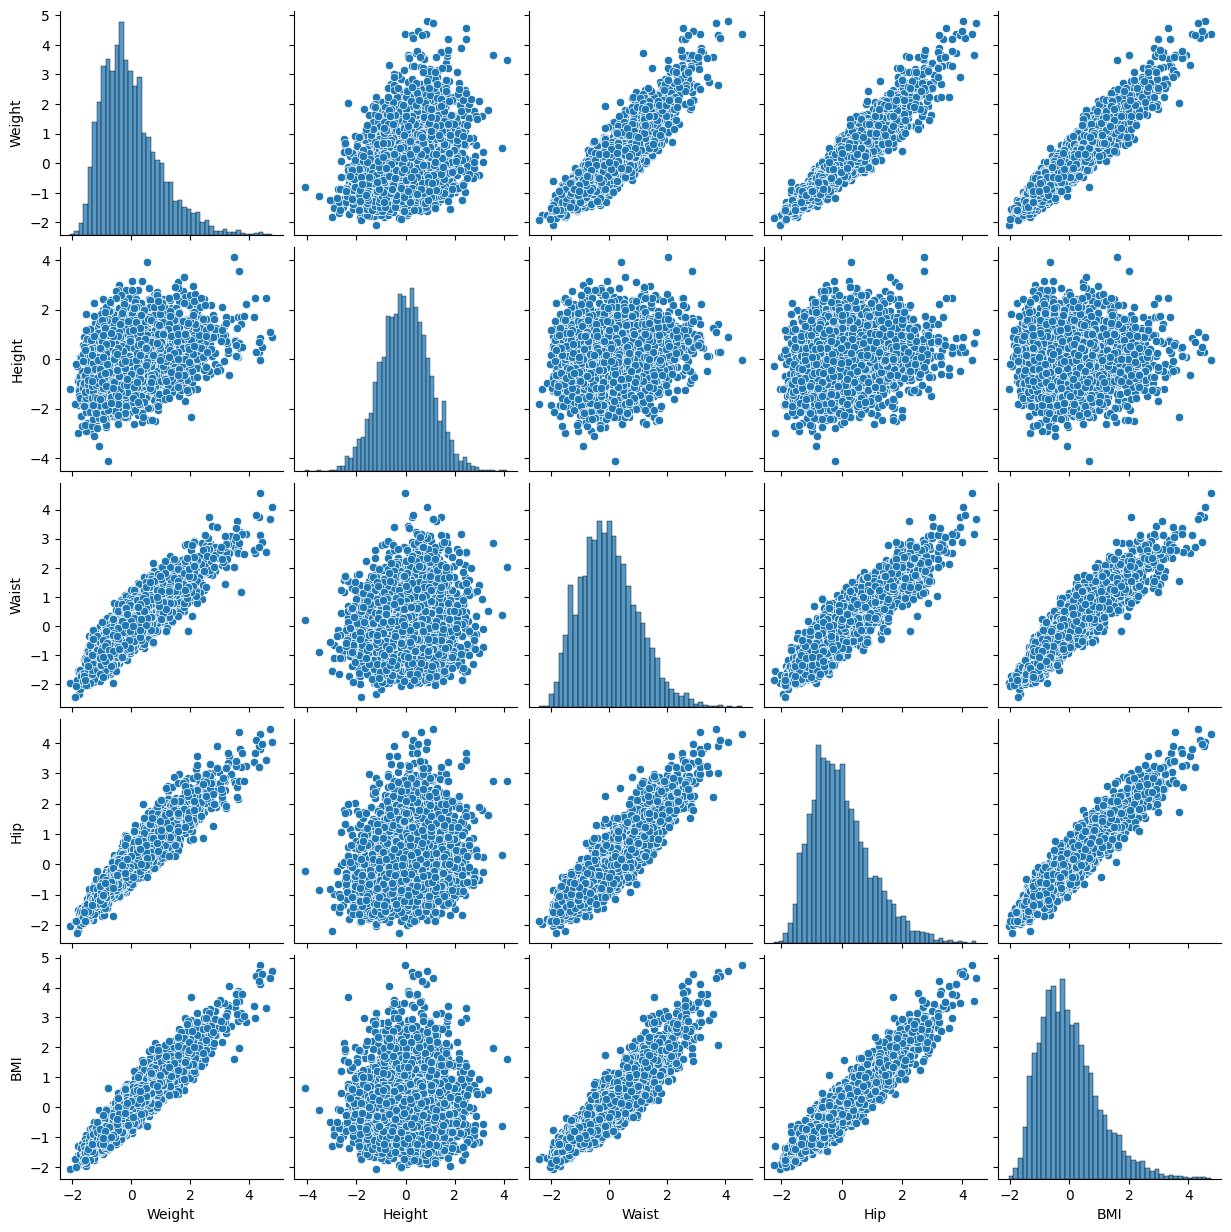

In [9]:
import seaborn as sns
import pandas as pd


df = pd.DataFrame(zfemale[:, [0, 1, 6, 5, 7]], columns=['Weight', 'Height', 'Waist', 'Hip', 'BMI'])
sns.pairplot(df)
plt.show()


**Step 9:Compute Waist-to-Height and Waist-to-Hip Ratios**

**Discussion:**

**Pearson Correlation:** Pearson’s correlation measures the linear relationship between two variables. A high positive value (close to 1) between BMI and waist circumference would indicate a strong linear relationship. If the value is closer to 0, it means the variables are not linearly related.

**Spearman Correlation: **Spearman’s correlation measures rank-based relationships and is useful when the relationship is not linear. If the Spearman correlation is high but Pearson is not, it suggests that although the variables increase together, their relationship may not be strictly linear.

**Interpretation:** Use these correlation results to make conclusions about which variables are strongly related. For example, if BMI and waist circumference have high correlations, it could suggest waist circumference is a good predictor of overall body mass.

In [12]:
# Add waist-to-height and waist-to-hip ratio columns to the male and female matrices
female_waist_height = female[:, 6] / female[:, 1]
female_waist_hip = female[:, 6] / female[:, 5]
male_waist_height = male[:, 6] / male[:, 1]
male_waist_hip = male[:, 6] / male[:, 5]
female = np.column_stack((female, female_waist_height, female_waist_hip))
male = np.column_stack((male, male_waist_height, male_waist_hip))


**10. Box-and-Whisker Plot for Ratios**

**Discussion:**

**Waist-to-Height Ratio (WHtR):** WHtR is used as a measure of central obesity, which is linked to higher health risks like cardiovascular disease. Comparing this ratio across genders can reveal potential differences in fat distribution. If males have a higher WHtR, it may indicate a higher concentration of abdominal fat compared to females.

**Waist-to-Hip Ratio (WHR):** WHR is another indicator of fat distribution. A higher ratio in males may indicate that they carry more fat in their abdomen, while a lower ratio in females might suggest fat is more distributed around the hips. This can be linked to physiological differences between the genders.

**Conclusion:** Discuss the health implications of these ratios. For example, high WHtR or WHR values in both males and females may indicate a greater risk of metabolic diseases.

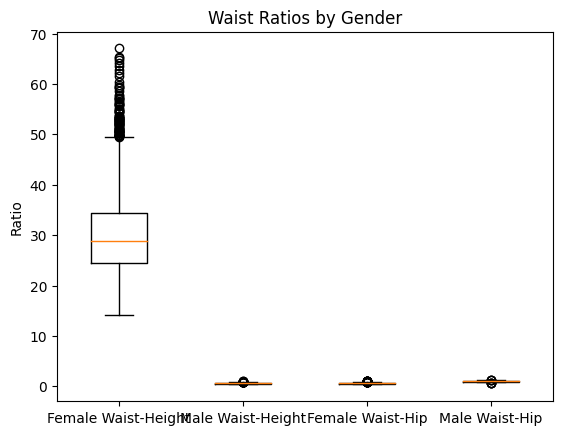

In [13]:
# Plot the boxplot for Waist-to-Height and Waist-to-Hip ratios for both genders
plt.boxplot([female[:, 7], male[:, 7], female[:, 8], male[:, 8]],
            labels=['Female Waist-Height', 'Male Waist-Height', 'Female Waist-Hip', 'Male Waist-Hip'])
plt.title('Waist Ratios by Gender')
plt.ylabel('Ratio')
plt.show()


**Step 11:Discuss BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio**

**Discussion:**

**Comparing Genders: **The boxplot allows a side-by-side comparison of the WHtR and WHR ratios for males and females. You can observe which gender tends to have higher or lower ratios, and identify any outliers.
Health Implications: Discuss any gender-based trends that emerge. For example, if males generally have higher WHtR and WHR values, it might suggest different patterns of fat accumulation between the genders, which could have implications for targeted health interventions.

**Step 12:Standardized Measurements for Lowest and Highest BMI**

**Discussion:**

**Lowest BMI: **Individuals with the lowest BMI often have body measurements (like weight, waist circumference, and hip circumference) that are below the average for the dataset. This could be due to being underweight or having a lean body composition.

**Highest BMI:** Those with the highest BMI likely have body measurements significantly above average, especially in terms of weight and waist circumference. This could indicate obesity or a higher-than-normal body fat percentage.

**Insight:** Comparing these two groups gives insights into how body measurements differ across the spectrum of BMI, and highlights the extremes of body composition in the population. For instance, individuals with high BMI may also have high waist-to-hip or waist-to-height ratios, further linking BMI to fat distribution.


In [14]:
lowest_bmi = np.argsort(female[:, 7])[:5]
highest_bmi = np.argsort(female[:, 7])[-5:]

print("Lowest BMI Individuals:\n", zfemale[lowest_bmi, :])
print("Highest BMI Individuals:\n", zfemale[highest_bmi, :])


Lowest BMI Individuals:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]
Highest BMI Individuals:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.05585782 -0.1